# RHTE OpenDJ ML: Pre-analysis
Goal: Analyse the options for a machine learning based curator.

MVP: Organize playlist by grouping similar tracks
1. Determine groups in a list of given playlists using ML clustering (unsupervised learning)
2. Normalized data for prediction
3. Find supervised learning for predictions
4. Test prediction by building a playlist from random data


# Determine groups in a list of given playlist using ML clustering (unsupervised learning)


- Read data
- Show a few stats

In [1]:
import json
import numpy as np
import pandas as pd
import sklearn.utils
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


with open('data/all-tracks-input.json') as data_file:    
    input_data = json.load(data_file)

track_data = pd.DataFrame.from_dict(input_data, orient='columns')

## Explore Data

In [2]:
print("\n** Shape:", track_data.shape)
print("\n** Columns:", track_data.columns)


** Shape: (1223, 19)

** Columns: Index(['id', 'name', 'artist', 'year', 'image_url', 'duration_ms', 'preview',
       'popularity', 'provider', 'genre', 'danceability', 'energy',
       'acousticness', 'instrumentalness', 'liveness', 'happiness', 'bpm',
       'genreSimple', 'genreSimpleNum'],
      dtype='object')


In [3]:
print("\n** Some data:\n", track_data.head(5))



** Some data:
                        id                                       name  \
0  4m2RLN7imvsaLL1ZUGfFFw                             In White Rooms   
1  2EQA1eRfXvbHKMjSnzUtFD                                         Go   
2  3dX6WDwnHwYzB5t754oB4T                      Insomnia - Radio Edit   
3  6l0LbTF2V77M3LPpcOBmqX                      Halcyon and On and On   
4  1mv4lh1rW1K6xhxhJmEezy  Music Sounds Better With You - Radio Edit   

        artist  year                                          image_url  \
0  Booka Shade  2006  https://i.scdn.co/image/9266895a658d2f08c18a1d...   
1         Moby  1992  https://i.scdn.co/image/5aeda4aa538ea0b0e5487b...   
2    Faithless  2010  https://i.scdn.co/image/ec84ad08a54efb10642ce0...   
3      Orbital  1993  https://i.scdn.co/image/9c2c32dfc5f2806c24c6f3...   
4     Stardust  1998  https://i.scdn.co/image/69e94747e18634d1034dab...   

   duration_ms                                            preview  popularity  \
0       326840  htt

In [4]:
track_data.head(5)

,id,name,artist,year,image_url,duration_ms,preview,popularity,provider,genre,danceability,energy,acousticness,instrumentalness,liveness,happiness,bpm,genreSimple,genreSimpleNum
0,4m2RLN7imvsaLL1ZUGfFFw,In White Rooms,Booka Shade,2006,https://i.scdn.co/image/9266895a658d2f08c18a1d...,326840,https://p.scdn.co/mp3-preview/4534edc43f5c465b...,50,spotify,"deep euro house, electronic, frankfurt electro...",80,65,0,82,23,10,125,house,42
1,2EQA1eRfXvbHKMjSnzUtFD,Go,Moby,1992,https://i.scdn.co/image/5aeda4aa538ea0b0e5487b...,217000,https://p.scdn.co/mp3-preview/b61e35c58d285b8d...,45,spotify,"downtempo, electronic",68,85,0,93,9,56,126,downtempo,15
2,3dX6WDwnHwYzB5t754oB4T,Insomnia - Radio Edit,Faithless,2010,https://i.scdn.co/image/ec84ad08a54efb10642ce0...,215093,https://p.scdn.co/mp3-preview/a273663b695ada2a...,60,spotify,"big beat, downtempo, electronic",72,83,1,1,10,28,127,beat,3
3,6l0LbTF2V77M3LPpcOBmqX,Halcyon and On and On,Orbital,1993,https://i.scdn.co/image/9c2c32dfc5f2806c24c6f3...,567106,None,5,spotify,"alternative dance, big beat, breakbeat, drum a...",58,73,10,93,18,18,127,dance,12
4,1mv4lh1rW1K6xhxhJmEezy,Music Sounds Better With You - Radio Edit,Stardust,1998,https://i.scdn.co/image/69e94747e18634d1034dab...,260906,https://p.scdn.co/mp3-preview/90f925424294d179...,61,spotify,,73,66,0,21,31,36,124,unknown,1


In [5]:
print("\n** Info:\n", track_data.info)



** Info:
 <bound method DataFrame.info of                           id                                       name  \
0     4m2RLN7imvsaLL1ZUGfFFw                             In White Rooms   
1     2EQA1eRfXvbHKMjSnzUtFD                                         Go   
2     3dX6WDwnHwYzB5t754oB4T                      Insomnia - Radio Edit   
3     6l0LbTF2V77M3LPpcOBmqX                      Halcyon and On and On   
4     1mv4lh1rW1K6xhxhJmEezy  Music Sounds Better With You - Radio Edit   
...                      ...                                        ...   
1218  3SmULHya2wcmiJghjWTL4P                                 Белладонна   
1219  1oh902Dm2qtg6TiTpcdCdH                            Ты меня пленила   
1220  77H5pHxR5WBUHQuNo5fb5N                                      Аллея   
1221  6btAjUGgNab1Pk52sQRMzu                              Пустой стакан   
1222  20XStJJIHddGpddVTYXxSq                                     Звезда   

               artist  year  \
0         Booka Shade  20

In [6]:
print("\n** Stats:\n", track_data.describe)


** Stats:
 <bound method NDFrame.describe of                           id                                       name  \
0     4m2RLN7imvsaLL1ZUGfFFw                             In White Rooms   
1     2EQA1eRfXvbHKMjSnzUtFD                                         Go   
2     3dX6WDwnHwYzB5t754oB4T                      Insomnia - Radio Edit   
3     6l0LbTF2V77M3LPpcOBmqX                      Halcyon and On and On   
4     1mv4lh1rW1K6xhxhJmEezy  Music Sounds Better With You - Radio Edit   
...                      ...                                        ...   
1218  3SmULHya2wcmiJghjWTL4P                                 Белладонна   
1219  1oh902Dm2qtg6TiTpcdCdH                            Ты меня пленила   
1220  77H5pHxR5WBUHQuNo5fb5N                                      Аллея   
1221  6btAjUGgNab1Pk52sQRMzu                              Пустой стакан   
1222  20XStJJIHddGpddVTYXxSq                                     Звезда   

               artist  year  \
0         Booka Shade 

## Cluster Data
### Prep data
- One hot encoding of genresimple
- Convert years to decade
- danceability to bool

In [7]:
title = "Clustering with genresimple, year as 'scalced' decade and danceability"

print("**** ", title)

genresimple_onehot = pd.get_dummies(track_data['genreSimple'], prefix = 'genresimple')

# Create decade with 1900 decade as zero
y=track_data['year'].values
scaled_decades = np.array(((y - 1900) - (y - 1900) % 10) / 100)

# Prep danceability bool
d=track_data['danceability'].values
dance = np.array(d > 50)

****  Clustering with genresimple, year as 'scalced' decade and danceability


### Cluster data
- Prep / join features
- Perform clustering
- Save results
- Plot distribution

** Number of clusters: 60
** Distribution: {-1: 74, 0: 16, 1: 4, 2: 36, 3: 22, 4: 3, 5: 35, 6: 8, 7: 3, 8: 22, 9: 4, 10: 4, 11: 17, 12: 86, 13: 5, 14: 45, 15: 10, 16: 6, 17: 4, 18: 3, 19: 100, 20: 8, 21: 44, 22: 20, 23: 3, 24: 3, 25: 26, 26: 11, 27: 6, 28: 19, 29: 4, 30: 24, 31: 25, 32: 139, 33: 66, 34: 13, 35: 4, 36: 10, 37: 11, 38: 4, 39: 3, 40: 10, 41: 4, 42: 52, 43: 70, 44: 4, 45: 52, 46: 5, 47: 9, 48: 4, 49: 5, 50: 5, 51: 9, 52: 8, 53: 4, 54: 12, 55: 7, 56: 4, 57: 3, 58: 3, 59: 3}


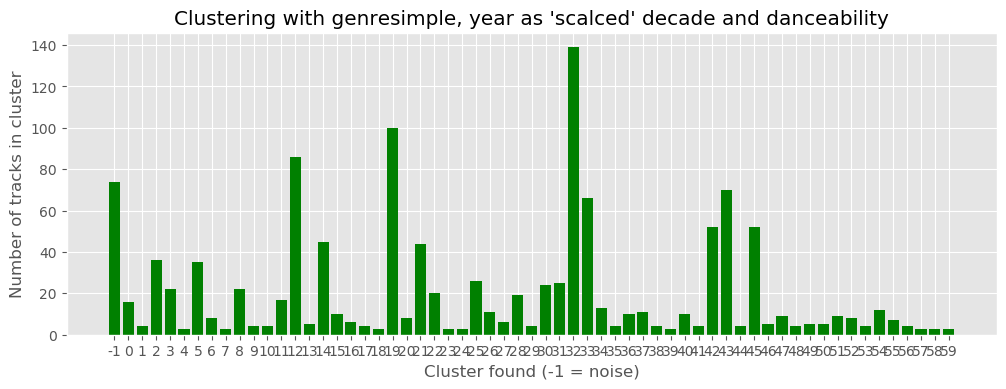

In [8]:
# Join data
track_data_features = np.column_stack((scaled_decades, dance, genresimple_onehot.to_numpy()))
db = DBSCAN(algorithm='auto', eps=0.1, min_samples=3 ).fit(track_data_features)

labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('** Number of clusters: %d' % n_clusters_)

unique, counts = np.unique(labels, return_counts=True)
distribution = dict(zip(unique, counts))

print("** Distribution:", distribution)

track_data_cluster = pd.concat([track_data, pd.DataFrame(labels,columns=['cluster'])], axis=1)
track_data_cluster.to_csv('data/all-tracks-clusters-raw.csv', index=False, encoding='utf-8')


x_pos = [i for i, _ in enumerate(unique)]

width_in_inches = 12
height_in_inches = 4
dots_per_inch = 100

plt.figure(
    figsize=(width_in_inches, height_in_inches),
    dpi=dots_per_inch)

plt.bar(x_pos, counts, color='green')
plt.xlabel("Cluster found (-1 = noise)")
plt.ylabel("Number of tracks in cluster")
plt.title(title)
plt.xticks(x_pos, unique)
plt.show()

### Normalize / de-skew data
- Trim down cluster with more than 50 items
- Plot data
- Save data

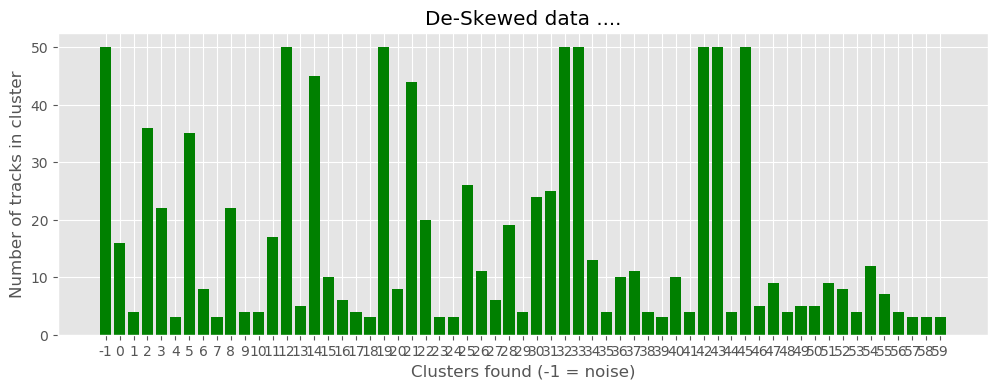

In [9]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Trim down cluster with more than 50 items
df = pd.DataFrame( track_data_cluster['cluster'].value_counts())
for a in df[df.cluster > 50].index:
    # print(a)
    dfx = track_data_cluster[track_data_cluster.cluster == a ]
    dfx = shuffle(dfx)
    train, test = train_test_split(dfx, test_size= 50 / dfx.shape[0])
    track_data_cluster = track_data_cluster.drop(track_data_cluster[track_data_cluster.cluster == a].index)
    track_data_cluster = track_data_cluster.append(test)

# Plot data
title = "De-Skewed data ...."

plt.figure(
    figsize=(width_in_inches, height_in_inches),
    dpi=dots_per_inch)

plt.bar(x_pos, track_data_cluster['cluster'].value_counts().sort_index().values, color='green')
plt.xlabel("Clusters found (-1 = noise)")
plt.ylabel("Number of tracks in cluster")
plt.title(title)
plt.xticks(x_pos, track_data_cluster['cluster'].value_counts().sort_index().index)
plt.show()

# Drop Unknown and save to file
track_data_cluster = track_data_cluster.drop(track_data_cluster[track_data_cluster.cluster == -1].index)
track_data_cluster.to_csv('data/all-tracks-clusters-clean.csv', index=False, encoding='utf-8')

# Find supervized learning for predictions
- Load clustered data from disk
- Feature engineering
- Train various models

## Load clustered data from disk and Feature engineering

In [10]:
import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.utils.validation import column_or_1d

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.multiclass import OutputCodeClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score
import pickle
import random


prefix_genresimple = 'genresimple'

input_data = pd.read_csv('data/all-tracks-clusters-clean.csv') 

print ("== Load data ", "="*40)  
print ("The dataset has {} data points with {} variables each.".format(*input_data.shape)) 
print (input_data.columns)

#################################################
# Shortcut: Prepare data like it was use for clustering

track_data = input_data[['genreSimple', 'year','danceability', 'cluster']]

# One hot encoding of genreSimple
genresimple_onehot = pd.get_dummies(track_data['genreSimple'], prefix = prefix_genresimple)

# One hot encoding of the cluster

#clusterid_onehot = pd.get_dummies(track_data['cluster'], prefix = 'cluster')

# Create decade with 1900 decade as zero
y=track_data['year'].values
scaled_decades = np.array(((y - 1900) - (y - 1900) % 10) / 100)

# Prep danceability bool
dance = np.array(track_data['danceability'].values > 50)

# Merge features into data frame
track_data_features = pd.concat([pd.DataFrame(dance, columns=['danceability']), pd.DataFrame(scaled_decades, columns=['decade']), genresimple_onehot], axis=1)

print ("== Features ", "="*40)  
print ("The feature dataset has {} data points with {} variables each.".format(*track_data_features.shape)) 
print (track_data_features.columns)

== Load data  ========================================
The dataset has 934 data points with 20 variables each.
Index(['id', 'name', 'artist', 'year', 'image_url', 'duration_ms', 'preview',
       'popularity', 'provider', 'genre', 'danceability', 'energy',
       'acousticness', 'instrumentalness', 'liveness', 'happiness', 'bpm',
       'genreSimple', 'genreSimpleNum', 'cluster'],
      dtype='object')
== Features  ========================================
The feature dataset has 934 data points with 29 variables each.
Index(['danceability', 'decade', 'genresimple_beat', 'genresimple_boy band',
       'genresimple_dance', 'genresimple_disco', 'genresimple_edm',
       'genresimple_electro', 'genresimple_electronic',
       'genresimple_electropop', 'genresimple_eurodance',
       'genresimple_europop', 'genresimple_folk', 'genresimple_funk',
       'genresimple_hip hop', 'genresimple_house', 'genresimple_indie',
       'genresimple_invasion', 'genresimple_latin', 'genresimple_metal',
  

## Train various models

In [11]:
# Train models. Create test and training  data 
# print ("The feature dataset has {} data points with {} variables each.".format(*track_data_features.shape)) 
print (track_data_features.columns)

pct_test_size = 0.2
my_random_seed = 69

# X_all = track_data_features.values
# y_all = clusterid_onehot.values

clusterid_onehot = input_data[['cluster']]

print ("* Feature shape:", track_data_features.shape)
print ("* Labels shape:", clusterid_onehot.shape)


X_train, X_test, y_train, y_test  = train_test_split(track_data_features, clusterid_onehot, stratify=clusterid_onehot, test_size=pct_test_size, random_state=my_random_seed)

#
# Helper Functions to train and predicit 
#
 
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    y_pred = clf.predict(features)
 
    # Print and return results
    #return f1_score(target.values, y_pred, pos_label='yes', average='micro')
    return f1_score(target.values, y_pred, average='micro')

def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier

    clf.fit(X_train, column_or_1d(y_train))
    
    # Print the results of prediction for both training and testing
    print ("F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print ("F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test)))
    
    
    
#  Initialize the three models
clf_A = DecisionTreeClassifier(random_state=my_random_seed)
clf_B = SVC(gamma='auto', random_state=my_random_seed)
clf_C = LinearSVC()
clf_D = OutputCodeClassifier(LinearSVC(random_state=0), code_size=2, random_state=my_random_seed)


# loop thru models [clf_A, clf_B, clf_B, clf_D]
for clf in [clf_A, clf_B, clf_C, clf_D]:
    print ("\n{}: \n".format(clf.__class__.__name__))
    train_predict(clf, X_train, y_train, X_test, y_test)
    scores = cross_val_score(clf, track_data_features, column_or_1d(clusterid_onehot), cv=3)
    print ("cross_validation:", scores, scores.mean())


#
# TODO: Tuning the hyper-parameters of the estimator. Skip for now. 
#
    
#
# Save model to disk  
#    

print ("\n","="*60)  
print ("* Save {} model".format(clf_A.__class__.__name__))
 
# save the model to disk
filename = 'data/finalized_model.sav'
pickle.dump(clf_A, open(filename, 'wb'))
 





Index(['danceability', 'decade', 'genresimple_beat', 'genresimple_boy band',
       'genresimple_dance', 'genresimple_disco', 'genresimple_edm',
       'genresimple_electro', 'genresimple_electronic',
       'genresimple_electropop', 'genresimple_eurodance',
       'genresimple_europop', 'genresimple_folk', 'genresimple_funk',
       'genresimple_hip hop', 'genresimple_house', 'genresimple_indie',
       'genresimple_invasion', 'genresimple_latin', 'genresimple_metal',
       'genresimple_pop', 'genresimple_punk', 'genresimple_rock',
       'genresimple_room', 'genresimple_soul', 'genresimple_techno',
       'genresimple_trance', 'genresimple_unknown', 'genresimple_wave'],
      dtype='object')
* Feature shape: (934, 29)
* Labels shape: (934, 1)

DecisionTreeClassifier: 

Training a DecisionTreeClassifier using a training set size of 747. . .
F1 score for training set: 1.0000.
F1 score for test set: 1.0000.
cross_validation: [1. 1. 1.] 1.0

SVC: 

Training a SVC using a training set si

### Load model and check F1 score

In [12]:
# load the model from disk

print ("* Local saved model and score again ...")


loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X_test)

print ("{}: F1 score for test set: {:.4f}.".format(clf_A.__class__.__name__, f1_score(y_test.values, result, average='micro')))

* Local saved model and score again ...
DecisionTreeClassifier: F1 score for test set: 1.0000.


# Test: Build a playlist from random data


In [15]:
#
# Few Tests: 1. Build a playlist from random data
#

def predict_cluster(track: dict):
    ''' Predict a clsuter id for a given track. Pass track as dict. '''
    
    cluster_id = -1
    
    track_genresimple_onehot = dict(zip( genresimple_onehot.columns, [0] * len(list(genresimple_onehot.columns)) ))
    track_genresimple_onehot[prefix_genresimple +   '_' +  test_track['genreSimple']] = 1

    y = track['year']

    t = [ track['danceability'] > 50, ((y - 1900) - (y - 1900) % 10) / 100 ]
    t.extend(list(track_genresimple_onehot.values()))
    cluster_id = loaded_model.predict([t])[0]
    return cluster_id


def insert_row(row_nr, df, row): 
    df1 = df[0:row_nr] 
    df2 = df[row_nr:]  
    #df1.loc[row_nr]=row  
   
    df1 = df1.append(row)
    df_result = pd.concat([df1, df2]) 
    df_result.index = [*range(df_result.shape[0])] 
    return df_result 

play_list = pd.DataFrame(columns=input_data.columns)

for i in range(100):
    j = random.randint(0, input_data.shape[0]-1)
    test_track = input_data.iloc[j, :].to_dict()  
    predicted_cluster_id = predict_cluster(test_track)

    print("{}/{}: Artist: {}, Genre: {}, Year: {}, Dance: {} => {}".format( i,j, \
          test_track['artist'],test_track['genreSimple'],test_track['year'],test_track['danceability'],predicted_cluster_id ))

    cluster_pos = list(play_list.loc[play_list['cluster'] == predicted_cluster_id].index)

    if len(cluster_pos) == 0:
        play_list = play_list.append(input_data.iloc[j, :])
    else:
        play_list = insert_row(cluster_pos[-1], play_list, input_data.iloc[j, :])
        
        print ("Insert:", j)
    play_list.index = [*range(play_list.shape[0])]

0/107: Artist: Mia., Genre: indie, Year: 2004, Dance: 72 => 27
1/580: Artist: Jony, Genre: dance, Year: 2019, Dance: 35 => 13
2/201: Artist: Eddie Thoneick, Genre: room, Year: 2019, Dance: 63 => 21
3/103: Artist: Mia., Genre: indie, Year: 2006, Dance: 75 => 27
Insert: 103
4/794: Artist: Pink Floyd, Genre: rock, Year: 2001, Dance: 50 => 33
5/28: Artist: Sylvia Tosun, Genre: trance, Year: 2008, Dance: 70 => 16
6/317: Artist: Will Smith, Genre: hip hop, Year: 1997, Dance: 88 => 28
7/531: Artist: Gemini Syndrome, Genre: unknown, Year: 2016, Dance: 50 => 20
8/345: Artist: Yeah Yeah Yeahs, Genre: dance, Year: 2009, Dance: 56 => 2
9/147: Artist: Modjo, Genre: house, Year: 2013, Dance: 73 => 14
10/429: Artist: Sister Sledge, Genre: pop, Year: 1979, Dance: 76 => 37
11/809: Artist: Radiohead, Genre: rock, Year: 1995, Dance: 42 => 33
Insert: 809
12/861: Artist: Jane's Addiction, Genre: metal, Year: 1988, Dance: 32 => 45
13/640: Artist: Sean Paul, Genre: pop, Year: 2017, Dance: 91 => 19
14/536: Ar

In [14]:
play_list

,id,name,artist,year,image_url,duration_ms,preview,popularity,provider,genre,danceability,energy,acousticness,instrumentalness,liveness,happiness,bpm,genreSimple,genreSimpleNum,cluster
0,5Q41NLTmGbVPozwHKK7bk2,Paradise City,Guns N' Roses,1987,https://i.scdn.co/image/7fbe9ede6722b20b5f4fe0...,406306,NaN,24,spotify,"glam metal, hard rock, rock",27,95,2,1,22,50,100,metal,52,45
1,0X1sqQ652p1sceKM2nJlIJ,Runaway,Bon Jovi,1984,https://i.scdn.co/image/28b11290613a2789d18910...,230666,https://p.scdn.co/mp3-preview/551134730332e0e2...,67,spotify,"glam metal, rock",48,90,0,0,15,67,152,metal,52,45
2,7c1Dar0pIAW7w5TzaGjt9t,Jane Says,Jane's Addiction,1988,https://i.scdn.co/image/f0f5481643c3e862761c4c...,287000,https://p.scdn.co/mp3-preview/2d05da32c80eda03...,63,spotify,"alternative metal, alternative rock, blues-roc...",43,65,4,0,13,49,82,metal,52,45
3,33iAwBBb962LFQei4J0b0b,What Is Love - Single Mix,Haddaway,2011,https://i.scdn.co/image/cfdd8b9c92638f6951fe5f...,269000,NaN,6,spotify,"bubblegum dance, eurodance, europop, hip house",68,76,2,1,26,74,124,dance,12,22
4,33GLigpe5PChdcOz8pGGrq,One Step Beyond,Madness,1979,https://i.scdn.co/image/b27ae22802e8bc51803849...,138373,NaN,5,spotify,"dance rock, ska, ska revival",47,92,5,4,16,94,155,rock,62,42
5,2HCaIYjkvWSZzaSKUoOh3d,Mr. Tambourine Man,The Byrds,1965,https://i.scdn.co/image/48666b9c58218a9d56f9b4...,149466,https://p.scdn.co/mp3-preview/2147c3bcac56bd48...,61,spotify,"album rock, art rock, blues-rock, brill buildi...",46,47,51,0,44,64,120,rock,62,42
6,6iWaf45YIhj0YT8GFGxsw0,Summertime Blues,Blue Cheer,1990,https://i.scdn.co/image/d281d4a839c6350eed5a6c...,226906,https://p.scdn.co/mp3-preview/2bbb00ffebee535c...,37,spotify,"blues-rock, classic garage rock, classic rock,...",46,51,46,0,27,66,138,rock,62,33
7,2RSHsoi04658QL5xgQVov3,Bad Liar,Imagine Dragons,2018,https://i.scdn.co/image/9c31900912f3383b769a31...,260773,https://p.scdn.co/mp3-preview/fc5f6cf3c0c67f69...,82,spotify,"modern rock, rock",38,64,7,0,37,8,178,rock,62,26
8,1CgbwsrNDlFrRuk2ebQ7zr,9Pm (Till I Come),ATB,1999,https://i.scdn.co/image/d0614396c13068570effa5...,193880,https://p.scdn.co/mp3-preview/05d17559491d30d2...,61,spotify,"german dance, german techno, progressive tranc...",67,94,3,93,15,75,130,dance,12,2
9,0bRXwKfigvpKZUurwqAlEh,Lovely Day,Bill Withers,1977,https://i.scdn.co/image/38340dd280247d4a72d443...,254560,https://p.scdn.co/mp3-preview/300afa67fbdef1d9...,72,spotify,"classic soul, funk, motown, quiet storm, soul",69,65,29,0,11,71,98,soul,70,47
